## Importing Libraries

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Getting Data Set

In [61]:

merged_df = pd.read_csv('merged_steam_data.csv')

merged_df


,appid,name_x,price_x,ccu,type,name_y,required_age,is_free,controller_support,dlc,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,10,Counter-Strike,999.0,16360,game,Counter-Strike,0.0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 118156},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,220,Half-Life 2,999.0,1177,game,Half-Life 2,0.0,False,NaN,[323140],...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 904, 'name': 'Half-Life 2 Trailer', 't...",{'total': 103743},"{'total': 33, 'highlighted': [{'name': 'Defian...","{'coming_soon': False, 'date': '16 Nov, 2004'}","{'url': 'http://steamcommunity.com/app/220', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
2,240,Counter-Strike: Source,999.0,7752,game,Counter-Strike: Source,0.0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 87660},"{'total': 147, 'highlighted': [{'name': 'Someo...","{'coming_soon': False, 'date': '1 Nov, 2004'}","{'url': 'http://steamcommunity.com/app/240', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
3,550,Left 4 Dead 2,999.0,20328,game,Left 4 Dead 2,0.0,False,full,NaN,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 5952, 'name': 'Left 4 Dead - The Sacri...",{'total': 418847},"{'total': 101, 'highlighted': [{'name': 'CL0WN...","{'coming_soon': False, 'date': '16 Nov, 2009'}","{'url': 'http://steamcommunity.com/app/550', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Left 4 Dead 2 featur..."
4,620,Portal 2,199.0,2793,game,Portal 2,0.0,False,full,[323180],...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 81613, 'name': 'Portal 2 - Perpetual T...",{'total': 227268},"{'total': 51, 'highlighted': [{'name': 'Wake U...","{'coming_soon': False, 'date': '18 Apr, 2011'}","{'url': 'http://steamcommunity.com/app/620', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1593500,God of War,4999.0,12509,game,God of War,18,False,full,NaN,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 256864004, 'name': 'Features Trailer',...",{'total': 19841},"{'total': 37, 'highlighted': [{'name': 'Father...","{'coming_soon': False, 'date': '14 Jan, 2022'}",{'url': 'https://support.sms.playstation.com/h...,https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Gameplay consists of..."
335,1677740,Stumble Guys,799.0,4423,game,Stumble Guys,0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 16, 'path_thumbnail': 'https://cdn.aka...","[{'id': 256856802, 'name': 'Stumble Guys out o...",{'total': 1046},NaN,"{'coming_soon': False, 'date': '7 Oct, 2021'}","{'url': '', 'email': 'support@kitkagames.com'}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
336,1794680,Vampire Survivors,299.0,52451,game,Vampire Survivors,0.0,False,full,NaN,...,"[{'id': 2, 'description': 'Single-pla

## Data Processing

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
merged_df = pd.read_csv('merged_steam_data.csv')

# Clean the 'required_age' column
# Convert '18+' to 18 and handle other age categories appropriately
merged_df['required_age'] = merged_df['required_age'].replace({'18+': 18, '13+': 13, '7+': 7, '3+': 3})

# Convert the column to numeric (if there are any other non-numeric entries, handle them)
merged_df['required_age'] = pd.to_numeric(merged_df['required_age'], errors='coerce')

# Drop rows where 'required_age' could not be converted to a number
merged_df.dropna(subset=['required_age'], inplace=True)

# Feature selection: choose relevant columns for your model
features = ['price_x', 'required_age', 'is_free', 'controller_support', 'dlc', 'categories', 'genres']  # Example features, you can adjust based on your analysis
target = 'ccu'  # The target variable (Concurrent Users)

# Fill missing values in the selected features and target with a strategy, for example, the mean
# Select only numeric columns for filling missing values
numeric_features = merged_df[features].select_dtypes(include=['float64', 'int64'])
merged_df[numeric_features.columns] = numeric_features.fillna(numeric_features.mean())

# Fill missing values in the target column
merged_df[target] = merged_df[target].fillna(merged_df[target].mean())

# Extract features and target variable
X = merged_df[features]
y = merged_df[target]

# Convert categorical features (e.g., 'genres', 'categories') into dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune the number of neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 161142599.1735294


## Hyperparameter Tuning

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test set
y_pred_log = best_knn.predict(X_test_scaled)

# Inverse transform the log predictions and actual values
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

# Compute evaluation metrics
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 6517.95
Root Mean Squared Error (RMSE): 12350.44
R² Score: -0.15


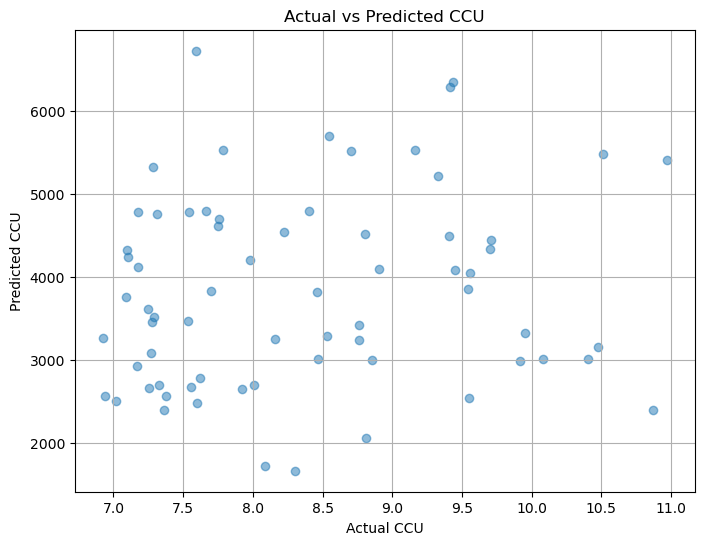

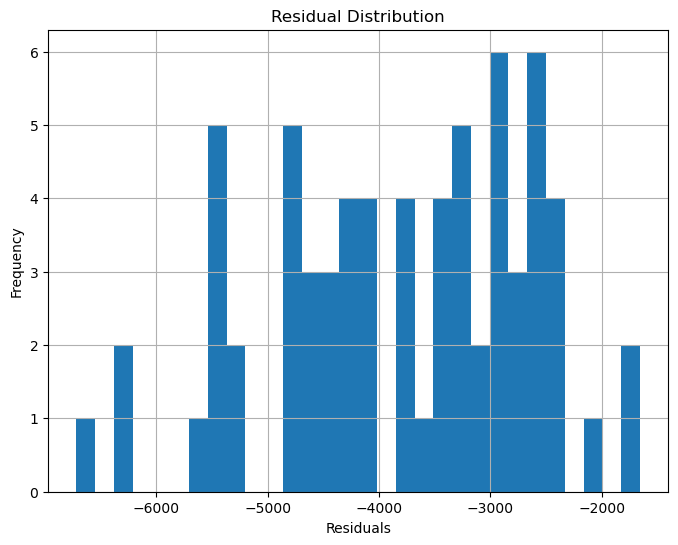

In [52]:
import matplotlib.pyplot as plt

# Plot 1: Actual vs Predicted CCU
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual CCU")
plt.ylabel("Predicted CCU")
plt.title("Actual vs Predicted CCU")
plt.grid(True)
plt.show()

# Plot 2: Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.grid(True)
plt.show()